# Fixing Overlapping Buildings

Overlapping buildings should either be joined or trimmed

In [1]:
import geopandas as gpd
import folium
from folium.plugins import MousePosition

In [13]:
import geopandas
import numpy
import matplotlib.pyplot as plt
import geoplanar
import shapely
from shapely.geometry import box, Polygon

### Read in data, add ID column and explore map

In [52]:
overlap=gpd.read_parquet('data/overlap.parquet')

In [66]:
overlap['ID']=overlap.index

In [67]:
o = overlap.explore(column=None, popup_columns=['ID'])
MousePosition().add_to(o)

In [68]:
o

In [69]:
overlap

,geometry,ID
20,"POLYGON ((4581905.482 5823481.686, 4581907.732...",20
32,"POLYGON ((4586495.665 5819371.910, 4586492.194...",32
247,"POLYGON ((4593588.410 5821657.892, 4593590.806...",247
248,"POLYGON ((4593328.086 5821651.695, 4593499.442...",248
250,"POLYGON ((4593012.893 5822233.921, 4592992.072...",250
...,...,...
1043341,"POLYGON ((4605150.259 5815477.342, 4605155.500...",1043341
1054236,"POLYGON ((4593302.448 5820577.679, 4593296.835...",1054236
1054241,"POLYGON ((4593713.926 5821726.920, 4593699.883...",1054241
1054242,"POLYGON ((4593508.840 5821651.398, 4593511.406...",1054242


### Join Buildings

In [ ]:
new_geom = shapely.unary_union(geoms)

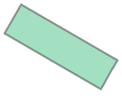

In [80]:
overlap.loc[1026417].geometry

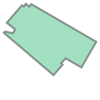

In [82]:
overlap.loc[21541].geometry

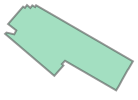

In [83]:
shapely.unary_union([overlap.loc[1026417].geometry, overlap.loc[21541].geometry])

In [84]:
new_geom=shapely.unary_union([overlap.loc[1026417].geometry, overlap.loc[21541].geometry])

In [85]:
#Then replace the geometry of one building with the new geometry and delete the other building

### Trim buildings

In [ ]:
gdf = geoplanar.trim_overlaps(gdf)

In [88]:
b1=overlap.loc[14930].geometry

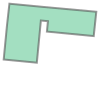

In [91]:
b1

In [90]:
b2=overlap.loc[809960].geometry

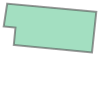

In [92]:
b2

In [93]:
gdf = geopandas.GeoDataFrame(geometry=[b1,b2])

In [94]:
gdf

,geometry
0,"POLYGON ((4571802.255 5807764.570, 4571802.497..."
1,"POLYGON ((4571815.297 5807778.249, 4571817.765..."


In [97]:
gdf=geoplanar.trim_overlaps(gdf)

/Users/lisawinkler/opt/anaconda3/envs/py312_uscuni_buildingfootprints/lib/python3.12/site-packages/geoplanar/overlap.py:23: FutureWarning: The `query_bulk()` method is deprecated and will be removed in GeoPandas 1.0. You can use the `query()` method instead.
  intersections = gdf.sindex.query_bulk(gdf.geometry, predicate='intersects').T
/Users/lisawinkler/opt/anaconda3/envs/py312_uscuni_buildingfootprints/lib/python3.12/site-packages/geoplanar/overlap.py:37: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_ind

In [98]:
gdf

,geometry
0,"POLYGON ((4571803.408 5807776.551, 4571804.257..."
1,"POLYGON ((4571815.297 5807778.249, 4571817.765..."


<Axes: >

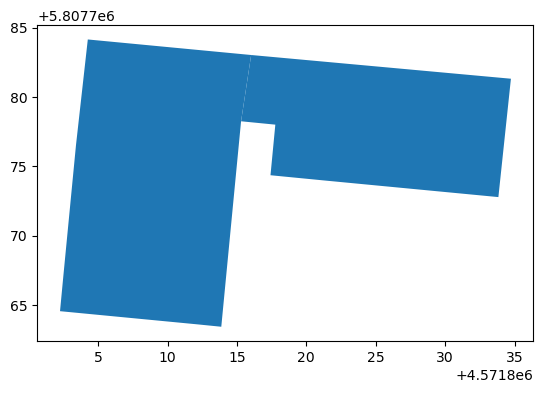

In [99]:
gdf.plot()